In [1]:
import numpy as np

# Load data from file (make sure the delimiter is set to ',')
data = np.loadtxt('hw2data1.txt', delimiter=',')

# Separate the columns into X and y
X = data[:, 0]  # all rows, first column
y = data[:, 1]  # all rows, second column

print("X[:10]:", X[:10])
print("y[:10]:", y[:10])

X[:10]: [-0.53240565 -0.68368294  0.09319761 -0.30042464 -0.5974206   0.0579498
 -0.17751184  0.10865262 -0.4347144  -0.80656976]
y[:10]: [17.592   9.1302 13.662  11.854   6.8233 11.886   4.3483 12.      6.5987
  3.8166]


Closed-form solution:
theta_0 = 5.8391, theta_1 = 4.5930


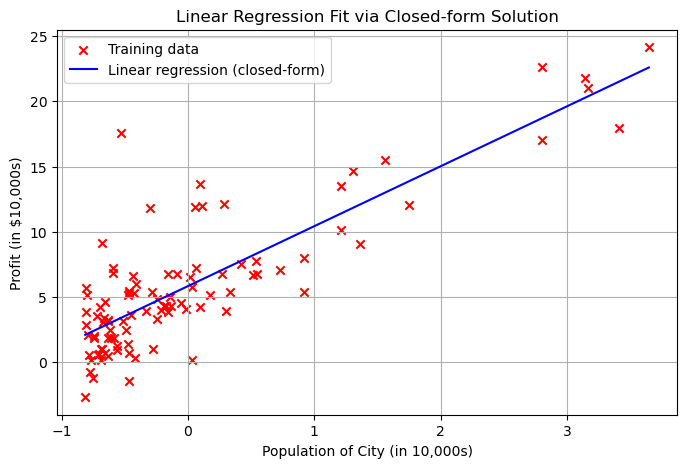

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# -------------------------------------------------
# 1) Closed-form solution for linear regression
# -------------------------------------------------

# Load data (ensure the file hw2data1.txt is in the same directory or provide a full path)
data = np.loadtxt('hw2data1.txt', delimiter=',')

# Separate columns into X (population) and y (profit)
X_raw = data[:, 0]  # shape = (m,)
y = data[:, 1]      # shape = (m,)

m = len(y)          # number of training examples

# Build the design matrix: add a column of 1's for the intercept term
# Shape of X_design will be (m, 2)
X_design = np.column_stack((np.ones(m), X_raw))

# Normal Equation: theta = (X^T X)^{-1} X^T y
theta = np.linalg.inv(X_design.T @ X_design) @ (X_design.T @ y)

theta_0, theta_1 = theta[0], theta[1]
print("Closed-form solution:")
print(f"theta_0 = {theta_0:.4f}, theta_1 = {theta_1:.4f}")

# -------------------------------------------------
# Visualization
# -------------------------------------------------

# Plot the original data
plt.figure(figsize=(8,5))
plt.scatter(X_raw, y, color='red', marker='x', label='Training data')

# Plot the linear fit (for visualization, create a range of x-values)
x_range = np.linspace(min(X_raw), max(X_raw), 100)
y_pred = theta_0 + theta_1 * x_range

plt.plot(x_range, y_pred, label='Linear regression (closed-form)', color='blue')
plt.xlabel('Population of City (in 10,000s)')
plt.ylabel('Profit (in $10,000s)')
plt.title('Linear Regression Fit via Closed-form Solution')
plt.legend()
plt.grid(True)
plt.show()


Stochastic Gradient Descent solution:
theta_0 = 5.8407, theta_1 = 4.5920


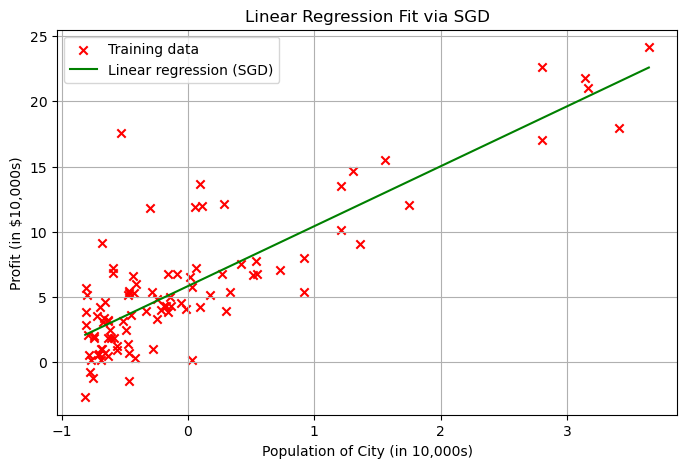

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# -------------------------------------------------
# 2) Stochastic Gradient Descent for linear regression
# -------------------------------------------------

def sgd_linear_regression(X, y, alpha=0.01, epochs=100, shuffle=True):
    """
    Perform stochastic gradient descent for simple linear regression
    X: design matrix of shape (m, 2) [ [1, x1], [1, x2], ..., [1, x_m] ]
    y: target values of shape (m,)
    alpha: learning rate
    epochs: number of passes over the entire dataset
    shuffle: whether to shuffle data each epoch
    Returns: theta, the learned parameters [theta_0, theta_1]
    """
    m = len(y)
    # Initialize parameters to zero (or small random)
    theta = np.zeros(2)  # [theta_0, theta_1]
    
    for _ in range(epochs):
        if shuffle:
            # Shuffle the data each epoch
            indices = np.arange(m)
            np.random.shuffle(indices)
        else:
            indices = np.arange(m)
        
        for i in indices:
            # Compute the prediction for a single sample
            x_i = X[i]       # shape (2,)
            y_i = y[i]
            prediction = theta @ x_i  # dot product [theta_0, theta_1] dot [1, x_i]
            error = prediction - y_i
            
            # Gradient of the cost w.r.t theta
            grad = error * x_i  # shape (2,)

            # Update rule
            theta = theta - alpha * grad

    return theta

# Load the data
data = np.loadtxt('hw2data1.txt', delimiter=',')
X_raw = data[:, 0]
y = data[:, 1]
m = len(y)

# Prepare design matrix with intercept
X_design = np.column_stack((np.ones(m), X_raw))

# Perform SGD
alpha = 0.001   # learning rate (may need tuning)
epochs = 100     # number of passes (may need tuning)
theta_sgd = sgd_linear_regression(X_design, y, alpha=alpha, epochs=epochs)
theta_0_sgd, theta_1_sgd = theta_sgd

print("\nStochastic Gradient Descent solution:")
print(f"theta_0 = {theta_0_sgd:.4f}, theta_1 = {theta_1_sgd:.4f}")

# -------------------------------------------------
# Visualization
# -------------------------------------------------

plt.figure(figsize=(8,5))
plt.scatter(X_raw, y, color='red', marker='x', label='Training data')

# Plot the linear fit from SGD
x_range = np.linspace(min(X_raw), max(X_raw), 100)
y_pred_sgd = theta_0_sgd + theta_1_sgd * x_range

plt.plot(x_range, y_pred_sgd, label='Linear regression (SGD)', color='green')
plt.xlabel('Population of City (in 10,000s)')
plt.ylabel('Profit (in $10,000s)')
plt.title('Linear Regression Fit via SGD')
plt.legend()
plt.grid(True)
plt.show()

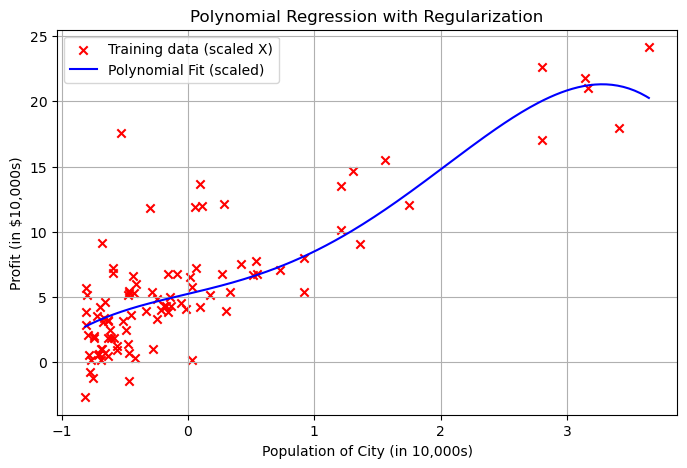

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def poly_features(x, degree):
    m = len(x)
    X_poly = np.ones((m, degree + 1))
    for d in range(1, degree + 1):
        X_poly[:, d] = x**d
    return X_poly

def sgd_polynomial_regression_regularized(X, y, alpha=1e-5, epochs=100, lambda_=1.0, shuffle=False):
    m, n = X.shape
    theta = np.zeros(n)
    
    for _ in range(epochs):
        idx = np.arange(m)
        
        for i in idx:
            x_i = X[i]
            y_i = y[i]
            pred_i = np.dot(theta, x_i)
            error = pred_i - y_i
            
            # Base gradient (from MSE part)
            grad = error * x_i
            
            # Add L2 reg to theta_j for j >= 1
            for j in range(1, n):
                grad[j] += lambda_ * theta[j]
            
            # Update
            theta -= alpha * grad
    
    return theta

# -------------- MAIN SCRIPT --------------

data = np.loadtxt('hw2data1.txt', delimiter=',')
X_raw = data[:, 0]
y = data[:, 1]


# 2) Generate polynomial features
degree = 4  # for example
X_poly = poly_features(X_raw, degree)

# 3) Train with a smaller alpha
alpha = 1e-5
epochs = 10000
lambda_ = 0.1
theta = sgd_polynomial_regression_regularized(X_poly, y, alpha=alpha, epochs=epochs, lambda_=lambda_)

# 4) Plot results
plt.figure(figsize=(8, 5))
plt.scatter(X_raw, y, color='red', marker='x', label='Training data (scaled X)')

# Create a dense set of scaled x-values
x_plot = np.linspace(min(X_raw), max(X_raw), 200)
X_plot_poly = poly_features(x_plot, degree)
y_plot = X_plot_poly @ theta
plt.plot(x_plot, y_plot, label='Polynomial Fit (scaled)', color='blue')

plt.xlabel('Population of City (in 10,000s)')
plt.ylabel('Profit (in $10,000s)')
plt.title("Polynomial Regression with Regularization")
plt.legend()
plt.grid(True)
plt.show()